In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

<h1> $$ Question\space  1.1$$

In [2]:
data = pd.read_csv('gene_expression_leukemia.txt',delimiter='\t')

In [3]:
data

,gene_id,patient_1,patient_2,patient_3,patient_4,patient_5,patient_6,patient_7,patient_8,patient_9,...,control_1,control_2,control_3,control_4,control_5,control_6,control_7,control_8,control_9,control_10
0,KCNK10,0.043050,0.001000,0.331762,0.158527,0.321553,0.001000,0.095015,0.001000,0.140739,...,0.436456,0.168293,0.001000,0.264344,0.201564,0.104615,0.265124,0.014904,0.318732,0.001000
1,HIPK3,0.001000,0.397436,0.225883,0.213334,0.324214,0.052124,0.640512,0.423932,0.454369,...,0.573554,0.035033,0.401582,0.206813,0.366067,0.497000,0.073216,0.624976,0.403787,0.743029
2,GAPDHP34,0.333400,0.656139,0.354216,0.432433,0.392793,0.457906,0.604631,0.176040,0.591937,...,0.841997,0.655422,0.321456,0.582065,0.207997,0.509606,0.554151,0.188615,0.475681,0.431665
3,ADI1,0.419342,0.260734,0.784624,0.675609,0.553582,0.480542,0.452946,0.927745,0.133886,...,0.387245,0.409068,0.822200,0.122041,0.178535,0.444941,0.348077,0.274838,0.426949,0.331344
4,NEO1,0.011867,0.002300,0.001000,0.001000,0.001000,0.001000,0.001000,0.183633,0.001000,...,0.222515,0.001000,0.001000,0.061090,0.440230,0.015395,0.001000,0.001000,0.001000,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24788,SNORD12,0.042043,0.336385,0.001000,0.501169,0.309202,0.237572,0.181500,0.423583,0.001000,...,0.131795,0.094720,0.231653,0.107139,0.329814,0.135019,0.001000,0.441585,0.472434,0.001000
24789,SNORA11D,0.080340,0.001000,0.198691,0.037421,0.001000,0.261899,0.001000,0.001000,0.169443,...,0.124125,0.001000,0.176620,0.390209,0.023781,0.001000,0.001000,0.303076,0.219746,0.114754
24790,RN5S148,2.321391,1.605219,2.019766,2.255225,1.738670,1.696658,1.688185,2.291915,2.246339,...,2.178855,2.129665,2.124962,1.838874,2.366674,2.337707,2.204501,2.075408,2.419046,1.930574
24791,ZNF536,0.064356,0.073083,0.001000,0.346649,0.169802,0.038636,0.316898,0.001000,0.147946,...,0.075044,0.001000,0.001000,0.179827,0.001000,0.033362,0.097950,0.499719,0.001000,0.001000


In [4]:
#Creating an empty list for all myc values to find within the dataset
myc_list = []

for i in range(0,24792):
    if(data.iloc[i][0][0]=='M'):
        if(data.iloc[i][0][1]=='Y'):
            if(data.iloc[i][0][2]=='C'):
                myc_list.append(data.iloc[i][0])

In [5]:
myc_list

['MYCBP2',
 'MYCBP2-AS1',
 'MYCNOS',
 'MYCBPAP',
 'MYCBP2-AS2',
 'MYCN',
 'MYC',
 'MYCL2',
 'MYCL1',
 'MYCBP']

In [6]:
#Creating a dataframe containing only myc related genes

myc_df = pd.DataFrame()

In [7]:
for i in data['gene_id']:
    if(i in myc_list):
        myc_df = myc_df.append(data.loc[data['gene_id']==i])

In [8]:
myc_df

,gene_id,patient_1,patient_2,patient_3,patient_4,patient_5,patient_6,patient_7,patient_8,patient_9,...,control_1,control_2,control_3,control_4,control_5,control_6,control_7,control_8,control_9,control_10
772,MYCBP2,1.171230,1.200337,1.138964,1.342916,1.185832,1.085076,1.120611,1.464719,1.039485,...,1.401981,1.079318,1.080226,0.809913,1.023451,0.837408,1.228913,0.798015,1.587505,1.093440
1009,MYCBP2-AS1,0.667799,0.247340,0.222877,0.654441,0.384775,0.296022,0.680216,0.772000,0.739249,...,0.247045,0.430585,0.712747,0.585266,0.507064,0.141727,0.453285,0.411788,0.341768,0.141582
1438,MYCNOS,1.035048,0.558983,0.882503,0.736541,0.694695,0.800796,0.868640,0.647376,0.463303,...,0.852216,0.866280,0.747739,0.918630,0.725740,0.970105,0.861520,0.679057,0.738820,0.933094
2880,MYCBPAP,1.640195,1.568556,1.695006,1.731252,2.023078,1.613274,1.837868,1.916871,1.777652,...,1.423131,1.691536,1.486548,1.790998,1.807828,1.938631,1.611365,2.179057,1.975461,1.602427
3110,MYCBP2-AS2,1.384810,1.633976,1.496307,2.017129,1.625399,1.727221,1.791885,1.588016,1.758116,...,1.681877,1.600613,1.930126,1.720482,1.586692,1.430530,1.609926,1.608333,1.850363,1.404199
4231,MYCN,0.777345,0.565436,0.953592,0.851854,0.677543,1.018280,0.585344,0.578996,0.850715,...,0.510264,0.764213,0.540363,0.502064,0.624773,0.855530,0.701251,0.476785,0.606618,0.752205
7338,MYC,4.213870,4.456964,4.425233,4.345393,4.355527,4.216532,4.274704,4.197893,4.447032,...,4.309235,4.638998,4.242273,4.545762,4.347171,4.322249,4.513073,4.498080,4.200345,4.483737
9677,MYCL2,0.001000,0.001000,0.001000,0.493310,0.069426,0.214454,0.001000,0.192675,0.001000,...,0.360962,0.073417,0.216464,0.204220,0.191924,0.195367,0.001000,0.028839,0.001000,0.068944
10756,MYCL1,1.602415,0.823690,1.185120,1.519952,1.278349,1.552331,1.310188,1.279970,1.009170,...,1.332768,0.929264,1.361689,1.299964,1.331033,1.296997,0.974562,1.283519,1.509484,1.211121
19169,MYCBP,1.954892,2.009125,1.832568,1.872753,1.938892,1.862283,1.868386,2.167965,1.669187,...,1.481389,2.424141,1.904754,2.140605,1.732306,1.933539,2.125527,1.939032,1.907369,1.774915


In [9]:
myc_df = myc_df.drop('gene_id',1)

In [10]:
myc_data = np.array(myc_df)

In [11]:
np.shape(myc_data)

(10, 20)

In [12]:
for i in range(0,10):
    for k in range(0,20):
        if(myc_data[i][k] > 2):
            myc_data[i][k] = 1
        else:
            myc_data[i][k] = 0

In [13]:
myc_data

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
        1., 0., 0., 0.]])

In [14]:
count_1s = 0
count_0s = 0

for i in range(0,10):
    for k in range(0,20):
        if(myc_data[i][k] == 1):
            count_1s += 1
        else:
            count_0s += 1

In [15]:
print('There are',count_1s,'instances of one in the MYC genes, and there are',count_0s,'instances of zero in the MYC genes')

There are 28 instances of one in the MYC genes, and there are 172 instances of zero in the MYC genes


In [16]:
print('Out of the patients, 13 of them had an instance of 1. Out of the controls, 14 of them had an instance of 1')

#You can verify this by counting where the positions were, prior to being made a numpy array;

Out of the patients, 13 of them had an instance of 1. Out of the controls, 14 of them had an instance of 1


In [17]:
stats.chisquare([13],f_exp=[14])

Power_divergenceResult(statistic=0.07142857142857142, pvalue=nan)

<h1> $$ Question\space  1.2$$

In [79]:
#Creating two dataframes, one with only control data and one with only patient data

patient_df = data.drop(['gene_id','control_1', 'control_2', 'control_3', 'control_4',
       'control_5', 'control_6', 'control_7', 'control_8', 'control_9',
       'control_10'],1)

control_df = data.drop(['gene_id','patient_1', 'patient_2', 'patient_3', 'patient_4',
       'patient_5', 'patient_6', 'patient_7', 'patient_8', 'patient_9',
       'patient_10'],1)

In [80]:
patient_df
control_df

,patient_1,patient_2,patient_3,patient_4,patient_5,patient_6,patient_7,patient_8,patient_9,patient_10
0,0.043050,0.001000,0.331762,0.158527,0.321553,0.001000,0.095015,0.001000,0.140739,0.096821
1,0.001000,0.397436,0.225883,0.213334,0.324214,0.052124,0.640512,0.423932,0.454369,0.001000
2,0.333400,0.656139,0.354216,0.432433,0.392793,0.457906,0.604631,0.176040,0.591937,0.621059
3,0.419342,0.260734,0.784624,0.675609,0.553582,0.480542,0.452946,0.927745,0.133886,0.493397
4,0.011867,0.002300,0.001000,0.001000,0.001000,0.001000,0.001000,0.183633,0.001000,0.245892
...,...,...,...,...,...,...,...,...,...,...
24788,0.042043,0.336385,0.001000,0.501169,0.309202,0.237572,0.181500,0.423583,0.001000,0.330598
24789,0.080340,0.001000,0.198691,0.037421,0.001000,0.261899,0.001000,0.001000,0.169443,0.001000
24790,2.321391,1.605219,2.019766,2.255225,1.738670,1.696658,1.688185,2.291915,2.246339,1.956877
24791,0.064356,0.073083,0.001000,0.346649,0.169802,0.038636,0.316898,0.001000,0.147946,0.253424


In [81]:
#Converting the patient and control dataframes to numpy arrays to perform calculations

patient_data = np.array(patient_df)
control_data = np.array(control_df)

In [82]:
patient_data

array([[4.30502214e-02, 1.00000000e-03, 3.31762186e-01, ...,
        1.00000000e-03, 1.40739440e-01, 9.68210465e-02],
       [1.00000000e-03, 3.97436151e-01, 2.25882559e-01, ...,
        4.23932045e-01, 4.54368944e-01, 1.00000000e-03],
       [3.33400176e-01, 6.56138711e-01, 3.54215828e-01, ...,
        1.76039585e-01, 5.91937218e-01, 6.21058863e-01],
       ...,
       [2.32139135e+00, 1.60521875e+00, 2.01976596e+00, ...,
        2.29191499e+00, 2.24633871e+00, 1.95687735e+00],
       [6.43557539e-02, 7.30825761e-02, 1.00000000e-03, ...,
        1.00000000e-03, 1.47946195e-01, 2.53424339e-01],
       [7.12797780e-01, 1.07518320e+00, 5.33817379e-01, ...,
        3.66039319e-01, 4.77358166e-01, 7.21064470e-01]])

In [205]:
#Creating an empty list to store the data that emerges from doing the t-test

t_test_data = []

#Performing a t-test calculation on every row between the patient data and the control data, and appending it to
#our empty list

for i in range(0,24793):
    t_test_data.append(stats.ttest_ind(patient_data[i],control_data[i]))

In [197]:
#List to hold our p-values that fall below 0.05
t_test_pvalue_threshold_data = []

#List to identify which genes fall below 0.05
genes_in_pvalue_threshold_ttest = []

#index counter to see which genes align with our given threshold of 0.05 or less
x = 0

#Using a for loop to see if the p-values fit the threshhold; If so, then the data is appended to our p-value list and
#the genes that also follow that threshhold, are placed in their own array as well for identification

for i in t_test_data:
    if(i[1]<0.05):
        genes_in_pvalue_threshold_ttest.append(data['gene_id'][x])
        t_test_pvalue_threshold_data.append(i[1])
    x += 1

In [195]:
genes_in_pvalue_threshold_ttest

['MPP5',
 'IGLV3-1',
 'EPB41L2',
 'DCHS2',
 'RPGRIP1',
 'STH',
 'BCAP',
 'MUC22',
 'LINC00230B',
 'RNU6-66',
 'VDAC1P1',
 'NMD3',
 'ARGLU1',
 'NFAT',
 'ABCD1P5',
 'POLR2I',
 'EYA4',
 'C1orf183',
 'LRRC4C',
 'MT1P1',
 'GPR137',
 'DCP2',
 'C10orf57',
 'MIR433',
 'GMIP',
 'LCE1F',
 'Erk',
 'FGF4',
 'AP1',
 'PKCb',
 'MEAF6',
 'RALBP1',
 'MIR1307',
 'TRPM6',
 'SOS',
 'RN5S55',
 'PUM1',
 'Myc',
 'KRTAP21-2',
 'GRM7',
 'ZBTB12B',
 'RBMX2P3',
 'IGLV2-14',
 'NINJ2',
 'LRRC37A2',
 'GRB2',
 'C14orf28',
 'CPAMD8',
 'C4orf38',
 'AKT',
 'PCDH8P1',
 'C2orf71',
 'GSK3b',
 'DOCK9',
 'SDAD1P4',
 'MIRLET7I',
 'BLNK']

<h1> $$ Question\space  1.3$$

In [101]:
ks_test_data = []

for i in range(0,24793):
    ks_test_data.append(stats.kstest(patient_data[i],control_data[i]))

In [102]:
ks_test_data

[KstestResult(statistic=0.4, pvalue=0.41752365281777043),
 KstestResult(statistic=0.3, pvalue=0.7869297884777761),
 KstestResult(statistic=0.2, pvalue=0.9944575548290717),
 KstestResult(statistic=0.6, pvalue=0.05244755244755244),
 KstestResult(statistic=0.2, pvalue=0.9944575548290717),
 KstestResult(statistic=0.3, pvalue=0.7869297884777761),
 KstestResult(statistic=0.3, pvalue=0.7869297884777761),
 KstestResult(statistic=0.5, pvalue=0.16782134274394334),
 KstestResult(statistic=0.4, pvalue=0.41752365281777043),
 KstestResult(statistic=0.3, pvalue=0.7869297884777761),
 KstestResult(statistic=0.2, pvalue=0.9944575548290717),
 KstestResult(statistic=0.4, pvalue=0.41752365281777043),
 KstestResult(statistic=0.3, pvalue=0.7869297884777761),
 KstestResult(statistic=0.5, pvalue=0.16782134274394334),
 KstestResult(statistic=0.4, pvalue=0.41752365281777043),
 KstestResult(statistic=0.4, pvalue=0.41752365281777043),
 KstestResult(statistic=0.2, pvalue=0.9944575548290717),
 KstestResult(statistic

In [199]:
#List to hold our p-values that fall below 0.05
ks_test_pvalue_threshold_data = []

#List to identify which genes fall below 0.05
genes_in_pvalue_threshold_ks = []

#index counter to see which genes align with our given threshold of 0.05 or less
x = 0

for i in ks_test_data:
    if(i[1]<0.05):
        genes_in_pvalue_threshold_ks.append(data['gene_id'][x])
        ks_test_pvalue_threshold_data.append(i[1])
    x += 1

In [107]:
genes_in_pvalue_threshold_ks

['BCAP',
 'NFAT',
 'Erk',
 'AP1',
 'PKCb',
 'SOS',
 'Myc',
 'RBMX2P3',
 'GRB2',
 'AKT',
 'SDAD1P4']

<h1> $$ Question\space  1.4$$

In [108]:
mw_test_data = []

for i in range(0,24793):
    mw_test_data.append(stats.mannwhitneyu(patient_data[i],control_data[i]))

In [109]:
mw_test_data

[MannwhitneyuResult(statistic=38.0, pvalue=0.1905342706601259),
 MannwhitneyuResult(statistic=35.0, pvalue=0.13642798424356428),
 MannwhitneyuResult(statistic=50.0, pvalue=0.4849249884965778),
 MannwhitneyuResult(statistic=26.0, pvalue=0.03783078607194352),
 MannwhitneyuResult(statistic=47.0, pvalue=0.4155453950424687),
 MannwhitneyuResult(statistic=39.0, pvalue=0.21367765694890384),
 MannwhitneyuResult(statistic=38.0, pvalue=0.19233653136775436),
 MannwhitneyuResult(statistic=25.0, pvalue=0.0319610673017273),
 MannwhitneyuResult(statistic=35.0, pvalue=0.13651816987559418),
 MannwhitneyuResult(statistic=37.0, pvalue=0.1723521110034788),
 MannwhitneyuResult(statistic=47.0, pvalue=0.42505336956926293),
 MannwhitneyuResult(statistic=36.0, pvalue=0.15374472830934066),
 MannwhitneyuResult(statistic=34.0, pvalue=0.12030653785531809),
 MannwhitneyuResult(statistic=32.0, pvalue=0.08824570451181007),
 MannwhitneyuResult(statistic=32.0, pvalue=0.09293836618293788),
 MannwhitneyuResult(statistic=

In [200]:
#List to hold our p-values that fall below 0.05
mw_test_pvalue_threshold_data = []

#List to identify which genes fall below 0.05
genes_in_pvalue_threshold_mw = []

#index counter to see which genes align with our given threshold of 0.05 or less
x = 0

for i in mw_test_data:
    if(i[1]<0.05):
        genes_in_pvalue_threshold_mw.append(data['gene_id'][x])
        mw_test_pvalue_threshold_data.append(i[1])
    x += 1

In [111]:
genes_in_pvalue_threshold_mw

['ADI1',
 'CSRNP1',
 'TP53INP2',
 'SMPD4P1',
 'PAICSP3',
 'USO1',
 'EPHA3',
 'KCNH7',
 'RXFP2',
 'AFAP1',
 'PRKCSH',
 'TMEM45B',
 'MPP5',
 'TSPY15P',
 'TBC1D1',
 'IGLV3-1',
 'ANKRD29',
 'ZCCHC11',
 'BEGAIN',
 'AGPHD1',
 'MIR526A1',
 'H2AFZP6',
 'KRT6C',
 'MMP27',
 'TRBV7-4',
 'SNRPGP6',
 'ZSCAN30',
 'YES1',
 'OR13C9',
 'ZBTB20',
 'ZDHHC9',
 'OFD1P13Y',
 'KRR1',
 'GALNS',
 'ZBTB20-AS3',
 'TUBA3D',
 'SUFU',
 'FGD6',
 'IFIT2',
 'RCC2P7',
 'OR6J1',
 'C14orf80',
 'KIAA1598',
 'KLHDC8A',
 'IGHVIII-16-1',
 'DPH3P1',
 'TICAM2',
 'GAPDHP62',
 'RNF6P1',
 'MIR191',
 'C6orf138',
 'CXorf59',
 'CRB1',
 'PARD6G',
 'CABP5',
 'OR5BN1P',
 'RPAP2',
 'OR2G3',
 'C12orf57',
 'OR5AK3P',
 'TRBV11-1',
 'PIGV',
 'KRT18P53',
 'GPC5',
 'DUXAP5',
 'C11orf93',
 'TPM3P7',
 'ZNF695',
 'B4GALT4',
 'RNU4-5P',
 'BCMO1',
 'TRNAV37P',
 'KDM5D',
 'LINC00347',
 'OR7E10P',
 'IGLV3-6',
 'PGR',
 'XRCC2',
 'FAT1P1',
 'RCHY1',
 'ACAD11',
 'CTAGE9',
 'MTA3',
 'EPHA2',
 'IGLJ1',
 'MTND4P21',
 'NAB2',
 'Bam32',
 'SEPT2P1',
 'ANP32B

<h1> $$ Question\space 1.5$$

Yes, there are certain genes that are identified by the t-test but not the mann-whitney test

PUM1 is a gene found in the t_test that is not in the mann-whitney test

In [130]:
#Using this to see what row the gene is in from our original data

data.loc[data['gene_id']=='PUM1']

,gene_id,patient_1,patient_2,patient_3,patient_4,patient_5,patient_6,patient_7,patient_8,patient_9,...,control_1,control_2,control_3,control_4,control_5,control_6,control_7,control_8,control_9,control_10
17993,PUM1,1.141514,1.210932,1.437569,1.37599,1.126061,1.289415,1.408718,1.223776,0.903624,...,1.344637,1.642624,1.230817,1.350645,1.278805,1.285069,1.227784,1.315493,1.673605,1.781638


(array([1., 0., 0., 0., 2., 2., 0., 2., 1., 2.]),
 array([0.90362387, 0.95701837, 1.01041286, 1.06380735, 1.11720185,
        1.17059634, 1.22399084, 1.27738533, 1.33077982, 1.38417432,
        1.43756881]),
 <BarContainer object of 10 artists>)

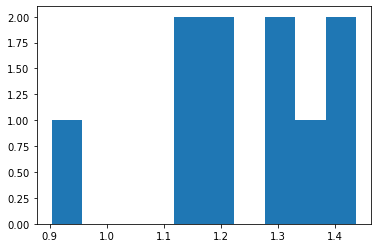

In [131]:
plt.hist(patient_df.iloc[17993])

(array([3., 2., 2., 0., 0., 0., 0., 1., 1., 1.]),
 array([1.22778424, 1.28316963, 1.33855502, 1.3939404 , 1.44932579,
        1.50471118, 1.56009656, 1.61548195, 1.67086734, 1.72625272,
        1.78163811]),
 <BarContainer object of 10 artists>)

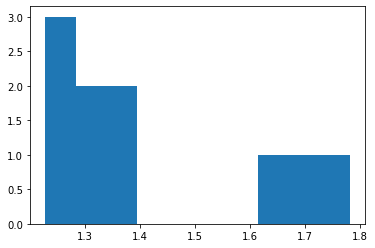

In [132]:
plt.hist(control_df.iloc[17993])

The gene is significant based on the t-test and not the mann-whitney test most likely because the mann-whitney test assumes that the data did not come from a t-distributed population

<h1> $$ Question\space  2.1$$

In [133]:
b_cell_data = pd.read_csv('B_cell_receptor.txt',delimiter='\t')

In [134]:
b_cell_data = b_cell_data.T

In [136]:
b_cell_data_array = np.array(b_cell_data)

In [137]:
b_cell_data_array

array([['CD22', 'CD72', 'BCR', 'Iga', 'Igb', 'FcgRIIB', 'LEU13', 'CD81',
        'CD19', 'CD21', 'SHP1', 'SYK', 'LYN', 'BTK', 'SHIP', 'VAV',
        'P13K', 'AKT', 'GSK3b', 'BLNK', 'BCAP', 'GRB2', 'SOS', 'PKCb',
        'Bam32', 'Rac', 'PLC-y2', 'CaN', 'NFAT', 'AP1', 'Erk', 'MEK1',
        'MEK2', 'Raf', 'Ras', 'RasGRP3', 'CALMA1', 'BCL-10', 'MALT1',
        'IKKa', 'IKKy', 'IKKb', 'NFKB', 'IKB']], dtype=object)

In [140]:
#Empty array to save these values to for later use
leukemia_expressed_genes = []

#Using a for loop to compare and show which genes from the t_test gene pool threshold, are also in the B cell data

for i in genes_in_pvalue_threshold_ttest:
    if(i in b_cell_data_array):
        print(i)
        leukemia_expressed_genes.append(i)

BCAP
NFAT
Erk
AP1
PKCb
SOS
GRB2
AKT
GSK3b
BLNK


<h1> $$ Question\space  2.2$$

In [148]:
#Empty dataframe to show leukemia expressed genes

leukemia_df = pd.DataFrame()

In [151]:
for i in leukemia_expressed_genes:
    leukemia_df = leukemia_df.append(data.loc[data['gene_id']==i])

In [152]:
leukemia_df

,gene_id,patient_1,patient_2,patient_3,patient_4,patient_5,patient_6,patient_7,patient_8,patient_9,...,control_1,control_2,control_3,control_4,control_5,control_6,control_7,control_8,control_9,control_10
5454,BCAP,0.333406,2.996926,1.859547,4.444532,2.148447,3.257892,0.563726,1.477084,0.564867,...,2.950420,2.547241,2.853723,3.057211,2.985552,2.915782,2.862079,3.096757,2.981508,2.887125
7081,NFAT,6.000000,4.719124,5.853108,6.000000,4.858420,5.292068,5.188841,5.424542,4.957358,...,1.838287,2.163249,2.240747,1.517626,1.642270,2.407907,1.095833,2.863955,2.462734,1.765175
12826,Erk,3.376293,3.859844,3.999367,3.282887,2.177927,2.535397,3.867461,3.474061,3.488354,...,5.039959,4.934861,3.837369,5.763670,5.163583,4.490722,5.224908,4.346292,5.537500,4.724685
15107,AP1,5.691757,4.948168,5.700000,5.317803,4.876857,5.510195,5.218896,5.137720,4.903318,...,4.606568,3.419549,3.871733,4.225405,3.280063,4.272006,4.234243,4.379560,4.297977,4.342344
15185,PKCb,4.334044,3.742561,4.235072,4.488251,4.614685,3.464601,4.868782,4.174578,4.111824,...,2.462427,2.486006,3.102062,2.854933,1.529530,2.576499,3.514214,2.181179,2.377453,2.558628
16996,SOS,1.632423,1.482223,2.259234,1.407366,1.337864,1.588888,2.055846,2.151234,3.385610,...,2.613524,0.425401,0.344257,0.000000,0.468612,0.322557,0.012850,0.642507,0.840810,0.701834
20987,GRB2,4.296068,4.704055,4.576707,5.452967,4.706036,5.490709,4.455960,4.983333,4.880532,...,1.302371,1.332595,0.868213,1.064649,0.913450,0.856735,0.011439,1.097545,0.365699,1.199359
21920,AKT,4.978146,6.000000,4.352391,6.000000,4.405776,4.052798,6.000000,5.320413,6.000000,...,4.610284,4.440909,4.668754,4.646176,4.619986,4.433110,4.524013,4.472658,4.412668,4.359956
22413,GSK3b,4.309984,4.114069,4.257730,3.333236,3.137418,4.714846,3.371426,5.331358,3.480293,...,3.550503,3.581312,3.355838,3.208541,3.718847,3.220438,3.380097,3.256844,3.509715,3.600547
24670,BLNK,1.028425,2.280532,2.403133,2.748191,1.235807,0.643680,1.109003,2.901553,1.724578,...,2.502109,2.354330,2.241701,2.574055,2.148709,2.379747,2.193499,2.598816,2.192034,2.731457


In [169]:
#247983 genes in the human genome

#10 of them are differentially expressed genes from the t-test

#Choosing 100 random genes from the sample

[M, n, N] = [24793, 10, 100]

#Using the hypergeometric function from scipy.stats

hypergeom_func = stats.hypergeom(M,n,N)
x = np.arange(0, 100+1)

#Doing the probability mass function of the leukemia data
pmf_leukemia_patients = hypergeom_func.pmf(x)

In [170]:
pmf_leukemia_patients

array([9.60383228e-01, 3.89071151e-02, 7.02172159e-04, 7.43340318e-06,
       5.11127391e-08, 2.38504032e-10, 7.64776589e-13, 1.66380835e-15,
       2.35005939e-18, 1.94579858e-21, 7.17076381e-25, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

<h1> $$ Question\space  3.1$$

In [222]:
#A cleaned version of the t_test data for all values, where only p-value is shown
clean_t_test_data = []

for i in t_test_data:
    clean_t_test_data.append(i[1])
    
clean_t_test_data

[0.3490927840438248,
 0.24829253753808217,
 0.8557804697910152,
 0.14925394968209338,
 0.5932811628937384,
 0.39317355890380523,
 0.32839494889373977,
 0.06487030050175721,
 0.41462395204511915,
 0.4787729919490742,
 0.9944591142746309,
 0.2870210164151312,
 0.24357287181328985,
 0.36925088404971596,
 0.19479542381769202,
 0.5817041280896935,
 0.6828957103229847,
 0.27538823003096635,
 0.24102306522826322,
 0.5079538973657397,
 0.34176193557917656,
 0.26121107713493585,
 0.8778661574855525,
 0.26133948553968317,
 0.4186016091792233,
 0.7210471844606778,
 0.7645560531873403,
 0.7592959867088318,
 0.4267637144411882,
 0.5338496499885812,
 0.7617425131951485,
 0.677202249117937,
 0.29081253489821673,
 0.7860404179703888,
 0.724304486496768,
 0.21476579987789882,
 0.18338076377011814,
 0.7237548536236316,
 0.07658762843894405,
 0.4810484789110977,
 0.22722835119582327,
 0.772409439546588,
 0.9293997382000243,
 0.23302392375629682,
 0.9837683950559731,
 0.6615327413518285,
 0.75292367771207

In [230]:
#Using the multipletests function to find out our adjusted p value
rejected, p_adjusted, _, alpha_corrected = multipletests(clean_t_test_data, method='bonferroni')

#Number of rejected p-values
print(np.sum(rejected))

#Number of adjusted p-values below 1
print(p_adjusted[p_adjusted<1])

print(alpha_corrected)

5
[2.50081275e-07 8.62194047e-01 3.73821508e-02 2.01472749e-01
 3.30413265e-07 1.92272041e-09 1.22382371e-08]
2.0166982616060987e-06


If I am interpreting this correctly, I believe that the correct p-value threshold needed to get a false positive rate less than 0.05 is a p-value threshhold of 1.

<h1> $$ Question\space  3.2$$

In [238]:
rejected, p_adjusted, _, alpha_corrected = multipletests(clean_t_test_data, method='fdr_bh')

#Number of rejected p-values
print(np.sum(rejected))

#Number of adjusted p-values below 1
print(p_adjusted[p_adjusted<1])

print(alpha_corrected)

6
[0.99994976 0.99994976 0.99994976 ... 0.99994976 0.99994976 0.99994976]
2.0166982616060987e-06


The threshold still needs to be at 1, or .99